<a id='top'></a>
# Process/Analyze Data in Python and Pandas
1. <a href='#section1'>Pandas Basics</a>
2. <a href='#section2'>Data Manipulation - Grouping</a>
3. <a href='#section3'>Data Manipulation - Statistical Computations</a>
4. <a href='#section4'>Data Manipulation - Matrix Operations on DataFrames</a>
5. <a href='#section5'>Portfolio Optimization in Finance</a>

In [128]:
########################
# IMPORT PACKAGES HERE #
########################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # numpy goes hand-in-hand with pandas
import pandas_datareader.data as pdr

<a id="section1"></a>
## Pandas Basics
### Data Strucures
* Series
    * One-dimensional
    * each element is associated with a (numeric/non-numeric) index
* DataFrame
    * Two-dimensional
    * think it as a relational db table (rows and columns)
    * Accepts Series and other DataFrame as input 

In [2]:
# empty series
pd.Series()

Series([], dtype: float64)

In [3]:
# create series with a python dict
pd.Series({
    'foo': 0,
    'bar': 1
})

bar    1
foo    0
dtype: int64

In [4]:
# create series with default index
pd.Series([0, 1, 2])

0    0
1    1
2    2
dtype: int64

In [5]:
# create series with default index
pd.Series([0, 1, 2], index=['a', 'b', 'c'])

a    0
b    1
c    2
dtype: int64

In [6]:
# create series with a numpy array
pd.Series(np.random.randn(10))

0    0.951831
1   -0.312691
2   -0.894874
3   -0.311216
4   -1.173162
5   -1.200634
6    0.359646
7   -0.096053
8    0.233656
9   -1.578982
dtype: float64

In [7]:
# scaling one value across index
pd.Series(0.99, index=['a', 'b', 'c'])

a    0.99
b    0.99
c    0.99
dtype: float64

In [8]:
# access series 
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s

a   -2.149752
b    1.085519
c   -0.016788
dtype: float64

In [9]:
s[-2] # positional

1.0855194141544127

In [10]:
s[[0,1]] # multi-select

a   -2.149752
b    1.085519
dtype: float64

In [11]:
s['b'] # key-value

1.0855194141544127

In [12]:
s[['a', 'b']] # multi-select

a   -2.149752
b    1.085519
dtype: float64

In [13]:
s[ s > 0 ] # conditional select

b    1.085519
dtype: float64

In [14]:
# simple computations
s + s

a   -4.299504
b    2.171039
c   -0.033575
dtype: float64

In [15]:
# computations of two different series. automatically maps to index
s1 = pd.Series([1,2,3])
s2 = pd.Series([2,1])
s1 + s2

0    3.0
1    3.0
2    NaN
dtype: float64

In [16]:
# dataframe from a dict
pd.DataFrame({
    'col1': [1,2,3],
    'col2': [4,5,6],
    'col3': [7,8,9]
})

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [17]:
# dataframe from list of dicts
pd.DataFrame([
    {'col1': 0, 'col2': 1, 'col3': 2},
    {'col1': 3, 'col2': 4, 'col3': 5},
])

,col1,col2,col3
0,0,1,2
1,3,4,5


In [18]:
# dataframe from series with column labels
pd.DataFrame({
    'col1': pd.Series([1,2,3]),
    'col2': pd.Series([4,5,6])
})

,col1,col2
0,1,4
1,2,5
2,3,6


In [19]:
# dataframe with custom index (row label) and column labels
d = pd.DataFrame(
    np.identity(3), 
    index=['row' + str(i) for i in range(3)], 
    columns=['col' + str(i) for i in range(3)]
)
d

,col0,col1,col2
row0,1.0,0.0,0.0
row1,0.0,1.0,0.0
row2,0.0,0.0,1.0


In [20]:
# access dataframe
# select column of data
d['col1']

row0    0.0
row1    1.0
row2    0.0
Name: col1, dtype: float64

In [21]:
# select row of data by label
d.loc['row1']

col0    0.0
col1    1.0
col2    0.0
Name: row1, dtype: float64

In [22]:
# select row of data by integer index
d.iloc[0]

col0    1.0
col1    0.0
col2    0.0
Name: row0, dtype: float64

In [23]:
# simple computation
d + d

,col0,col1,col2
row0,2.0,0.0,0.0
row1,0.0,2.0,0.0
row2,0.0,0.0,2.0


In [24]:
d - d.iloc[0] # data align by cols

,col0,col1,col2
row0,0.0,0.0,0.0
row1,-1.0,1.0,0.0
row2,-1.0,0.0,1.0


In [25]:
d.columns # show column labels

Index(['col0', 'col1', 'col2'], dtype='object')

In [26]:
d.index # show row index

Index(['row0', 'row1', 'row2'], dtype='object')

### Read CSV Data

In [27]:
# headless data - add column labels
df = pd.read_csv('datasets/1coinUSD.csv', names=['time_stamp', 'price', 'volumn'])
df.head()

,time_stamp,price,volumn
0,1394351059,621.0,0.01
1,1394351073,620.0,0.01
2,1394427477,620.0,0.01
3,1394427596,620.5,0.01
4,1394427614,621.0,0.01


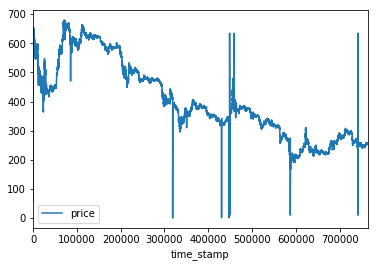

In [28]:
# plotting
df['time_stamp'] =  pd.Series(list(range(len(df))))
df.plot(x='time_stamp', y='price')
plt.show()

In [29]:
# invalidate data entries
df['weird_col'] = np.nan
# Problematic! NaNs are excluded when grouping
df.head()

,time_stamp,price,volumn,weird_col
0,0,621.0,0.01,NaN
1,1,620.0,0.01,NaN
2,2,620.0,0.01,NaN
3,3,620.5,0.01,NaN
4,4,621.0,0.01,NaN


In [30]:
np.isnan(df).tail() # validation

,time_stamp,price,volumn,weird_col
764727,False,False,False,True
764728,False,False,False,True
764729,False,False,False,True
764730,False,False,False,True
764731,False,False,False,True


In [31]:
df.fillna(0).tail() # fill NaN data with a valid value

,time_stamp,price,volumn,weird_col
764727,764727,253.8,0.02,0.0
764728,764728,253.6,0.07,0.0
764729,764729,253.6,0.20,0.0
764730,764730,253.8,0.30,0.0
764731,764731,253.8,0.33,0.0


<a id="section2"></a>
## Data Manipulation - Grouping

In [136]:
# load the FMA music datasets
df = pd.read_csv('datasets/music_track_info.csv')
df.head()

,track_id,album_id,album_title,album_url,artist_id,artist_name,artist_url,artist_website,license_image_file,license_image_file_large,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
0,2,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,4656,en,1293,NaN,3,NaN,Food,http://freemusicarchive.org/music/AWOL/AWOL_-_...
1,3,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1470,en,514,NaN,4,NaN,Electric Ave,http://freemusicarchive.org/music/AWOL/AWOL_-_...
2,5,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1933,en,1151,NaN,6,NaN,This World,http://freemusicarchive.org/music/AWOL/AWOL_-_...
3,10,6.0,Constant Hitmaker,http://freemusicarchive.org/music/Kurt_Vile/Co...,6,Kurt Vile,http://freemusicarchive.org/music/Kurt_Vile/,http://kurtvile.com,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,54881,en,50135,NaN,1,NaN,Freeway,http://freemusicarchive.org/music/Kurt_Vile/Co...
4,20,4.0,Niris,http://freemusicarchive.org/music/Chris_and_Ni...,4,Nicky Cook,http://freemusicarchive.org/music/Chris_and_Ni...,NaN,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,978,en,361,NaN,3,NaN,Spiritual Level,http://freemusicarchive.org/music/Chris_and_Ni...


In [137]:
# group by artist
df_grouped = df.groupby(['artist_name'])
df_grouped.count()

,track_id,album_id,album_title,album_url,artist_id,artist_url,artist_website,license_image_file,license_image_file_large,license_parent_id,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
artist_name,,,,,,,,,,,,,,,,,,,,,
AWOL,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,0,4,0,4,4
Abominog,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,0,2,0,2,2
Airway,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,0,2,2
Alec K. Redfearn & the Eyesores,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,0,4,0,4,4
Amoebic Ensemble,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,0,4,0,4,4
Andy Hayleck,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,0,2,0,2,2
Animal Writes,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,0,2,0,2,2
Arc and Sender,3,3,3,3,3,3,3,3,3,0,...,0,3,3,3,3,0,3,0,3,3
Area C,13,13,13,13,13,13,13,13,13,0,...,0,13,13,13,13,0,13,0,13,13


<a id="section3"></a>
## Data Manipulation - Statistical Computations

In [38]:
df = pd.DataFrame(np.random.randn(5,5))
df

,0,1,2,3,4
0,1.990902,-0.549855,0.711656,0.787379,1.073237
1,-0.965142,0.071200,0.094076,-0.639952,-1.294813
2,0.939933,0.831280,0.465198,-0.108374,0.520186
3,0.072269,0.225187,0.248969,-1.692826,0.385506
4,-0.903924,-0.809654,-1.372226,0.755011,-0.503354


In [39]:
df.mean()

0    0.226808
1   -0.046369
2    0.029535
3   -0.179752
4    0.036153
dtype: float64

In [40]:
df.median()

0    0.072269
1    0.071200
2    0.248969
3   -0.108374
4    0.385506
dtype: float64

In [41]:
df.std()

0    1.259341
1    0.650756
2    0.817365
3    1.038676
4    0.934668
dtype: float64

In [53]:
s1 = pd.Series(np.random.randn(10))
# s1.cov(s1)
s1.cov(s1)

0.95346640303495034

In [54]:
s2 = pd.Series(np.random.randn(10))
s2

0    1.757315
1    0.964335
2   -0.554670
3   -0.493723
4    1.772862
5    0.459919
6    1.191072
7    1.378886
8   -0.155531
9    0.140154
dtype: float64

In [56]:
s1.cov(s2)

0.18966094150589352

In [55]:
s1.corr(s2)

0.21846986772545404

<a id="section4"></a>
## Data Manipulation - Matrix Operations on DataFrames

In [58]:
# cartesian product review
s1 = pd.Series(np.random.randn(3))
s2 = pd.Series(np.random.randn(3))
print(s1)
print(s2)

0    0.063031
1    0.534155
2    0.457549
dtype: float64
0   -0.623285
1   -0.428205
2    0.039116
dtype: float64


In [59]:
c_product = [(i1, i2) for i1 in s1 for i2 in s2]
c_product

[(0.063031453701922216, -0.62328477993935238),
 (0.063031453701922216, -0.42820482722605752),
 (0.063031453701922216, 0.039115568901548124),
 (0.53415465187780709, -0.62328477993935238),
 (0.53415465187780709, -0.42820482722605752),
 (0.53415465187780709, 0.039115568901548124),
 (0.45754925147095193, -0.62328477993935238),
 (0.45754925147095193, -0.42820482722605752),
 (0.45754925147095193, 0.039115568901548124)]

In [65]:
# merge two dataframes by joining with key
df1 = pd.DataFrame(np.identity(3))
df1[3] = 99
df2 = pd.DataFrame(np.random.randn(3,3))
df2[3] = 99
print("{}\n{}".format(df1, df2))

     0    1    2   3
0  1.0  0.0  0.0  99
1  0.0  1.0  0.0  99
2  0.0  0.0  1.0  99
          0         1         2   3
0  0.183344  0.309418 -1.945711  99
1 -1.023451 -0.673088  0.418343  99
2  0.194481 -0.124380 -0.346541  99


In [66]:
pd.merge(df1, df2, how='inner', on=[3])

,0_x,1_x,2_x,3,0_y,1_y,2_y
0,1.0,0.0,0.0,99,0.183344,0.309418,-1.945711
1,1.0,0.0,0.0,99,-1.023451,-0.673088,0.418343
2,1.0,0.0,0.0,99,0.194481,-0.124380,-0.346541
3,0.0,1.0,0.0,99,0.183344,0.309418,-1.945711
4,0.0,1.0,0.0,99,-1.023451,-0.673088,0.418343
5,0.0,1.0,0.0,99,0.194481,-0.124380,-0.346541
6,0.0,0.0,1.0,99,0.183344,0.309418,-1.945711
7,0.0,0.0,1.0,99,-1.023451,-0.673088,0.418343
8,0.0,0.0,1.0,99,0.194481,-0.124380,-0.346541


In [74]:
df1 = pd.DataFrame(np.identity(3))
df2 = df2 = pd.DataFrame(np.random.randn(3,3))
print('{}\n{}'.format(df1, df2))

     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
          0         1         2
0  0.180179  0.476161  0.399309
1  0.844233 -0.252850  0.104922
2 -0.006107  1.355476  1.337016


In [75]:
df1.dot(df2)

,0,1,2
0,0.180179,0.476161,0.399309
1,0.844233,-0.252850,0.104922
2,-0.006107,1.355476,1.337016


In [76]:
df1 * df2

,0,1,2
0,0.180179,0.00000,0.000000
1,0.000000,-0.25285,0.000000
2,-0.000000,0.00000,1.337016


<a id="section5"></a>
## Portfolio Optimization in Finance
### Objective
maximize returns with certain risk threshold

In [132]:
# historical stock data
df = pdr.DataReader([
    'AMZN',
    'GOOG',
    'MSFT',
    'BLK',
    'AAPL'
],data_source='yahoo',start='01/01/2005')['Adj Close']
df.head()

,AAPL,AMZN,BLK,GOOG,MSFT
Date,,,,,
2017-10-06,155.300003,989.580017,463.220001,978.890015,76.000000
2017-10-05,155.389999,980.849976,464.429993,969.960022,75.970001
2017-10-04,153.479996,965.450012,457.910004,951.679993,74.690002
2017-10-03,154.479996,957.099976,450.790009,957.789978,74.260002
2017-10-02,153.809998,959.190002,449.950012,953.270020,74.610001


In [134]:
# daily returns
df.pct_change().head()

,AAPL,AMZN,BLK,GOOG,MSFT
Date,,,,,
2017-10-06,NaN,NaN,NaN,NaN,NaN
2017-10-05,0.000579,-0.008822,0.002612,-0.009123,-0.000395
2017-10-04,-0.012292,-0.015701,-0.014039,-0.018846,-0.016849
2017-10-03,0.006516,-0.008649,-0.015549,0.006420,-0.005757
2017-10-02,-0.004337,0.002184,-0.001863,-0.004719,0.004713
